In [ ]:
# Instalando a biblioteca Kaggle
!pip install kaggle

In [ ]:
# Configurando as credenciais da Kaggle
import os

os.makedirs('/root/.kaggle', exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Baixando o dataset do Kaggle
!kaggle datasets download -d joebeachcapital/linkedin-jobs

Dataset URL: https://www.kaggle.com/datasets/joebeachcapital/linkedin-jobs
License(s): DbCL-1.0
  0% 0.00/12.1k [00:00<?, ?B/s]
100% 12.1k/12.1k [00:00<00:00, 40.5MB/s]


In [ ]:
# Descompactando o arquivo do dataset baixado
!unzip linkedin-jobs.zip

Archive:  linkedin-jobs.zip
  inflating: final_data.csv          


In [ ]:
# Importando biblioteca pandas e lendo o arquivo com o dataset final
import pandas as pd

df = pd.read_csv('final_data.csv')

In [ ]:
# Exibindo as 5 primeiras linhas do DataFrame
df.head()

In [ ]:
# Aqui foi identificado que as colunas 'Level' e 'Involvement' estavam invertidas
# Alterando os nomes das colunas 'Level' para 'Employment_type' 
# e 'Involvement' para 'Level'
df = df.rename(columns={
    'Level': 'Employment_type',
    'Involvement': 'Level'
})
df.head()

,Company_Name,Class,Designation,Location,Total_applicants,LinkedIn_Followers,Employment_type,Level,Employee_count,Industry,...,REACTJS,AI,UI,TABLEAU,NODEJS,EXCEL,POWER BI,SELENIUM,HTML,ML
0,Wipro,Class 3,Project Manager,Maharashtra,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
1,Wipro,Class 3,Project Manager,Delhi,121,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
2,Wipro,Class 3,Project Manager,Delhi,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
3,Wipro,Class 3,Administrator,Telangana,0,6737300,Full-time,Mid-Senior level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,0
4,Wipro,Class 3,Project Manager,Maharashtra,119,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1


In [ ]:
# Exibindo informações sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Company_Name        811 non-null    object
 1   Class               811 non-null    object
 2   Designation         811 non-null    object
 3   Location            811 non-null    object
 4   Total_applicants    811 non-null    int64 
 5   LinkedIn_Followers  811 non-null    int64 
 6   Employment_type     811 non-null    object
 7   Level               811 non-null    object
 8   Employee_count      811 non-null    int64 
 9   Industry            811 non-null    object
 10  PYTHON              811 non-null    int64 
 11  C++                 811 non-null    int64 
 12  JAVA                811 non-null    int64 
 13  HADOOP              811 non-null    int64 
 14  SCALA               811 non-null    int64 
 15  FLASK               811 non-null    int64 
 16  PANDAS              811 no

In [ ]:
# Contando quantidade de valores nulos em cada coluna
df.isna().sum()

,0
Company_Name,0
Class,0
Designation,0
Location,0
Total_applicants,0
LinkedIn_Followers,0
Employment_type,0
Level,0
Employee_count,0
Industry,0


In [ ]:
# Exibindo nomes das colunas do DataFrame
df.columns

Index(['Company_Name', 'Class', 'Designation', 'Location', 'Total_applicants',
       'LinkedIn_Followers', 'Employment_type', 'Level', 'Employee_count',
       'Industry', 'PYTHON', 'C++', 'JAVA', 'HADOOP', 'SCALA', 'FLASK',
       'PANDAS', 'SPARK', 'NUMPY', 'PHP', 'SQL', 'MYSQL', 'CSS', 'MONGODB',
       'NLTK', 'TENSORFLOW', 'LINUX', 'RUBY', 'JAVASCRIPT', 'DJANGO', 'REACT',
       'REACTJS', 'AI', 'UI', 'TABLEAU', 'NODEJS', 'EXCEL', 'POWER BI',
       'SELENIUM', 'HTML', 'ML'],
      dtype='object')

In [ ]:
# Contando a quantidade de vagas para cada cargo
df_top_cargos = df['Designation'].value_counts().reset_index()
df_top_cargos.columns = ['Cargos', 'Contagem']
df_top_cargos

,Cargos,Contagem
0,Team Lead,26
1,Project Manager,25
2,Associate Tech Specialist,18
3,LTIMindtree Hiring SAP Project Manager,17
4,Mainframe Developer- PAN India,13
...,...,...
387,Paid Search Executive,1
388,Pre-sales consultant,1
389,Product Marketing Manager,1
390,Delivery Assurance Manager,1


In [ ]:
# Exibindo os 5 cargos com mais vagas disponíveis, ordenados de forma crescente
df_top5_cargos = df_top_cargos.head(5).sort_values(by = 'Contagem', ascending = True)
df_top5_cargos

,Cargos,Contagem
4,Mainframe Developer- PAN India,13
3,LTIMindtree Hiring SAP Project Manager,17
2,Associate Tech Specialist,18
1,Project Manager,25
0,Team Lead,26


In [ ]:
# Criando um novo DataFrame sem as colunas 'LinkedIn_Followers' e 'Employee_count'
df_limpo = df.drop(columns = ['LinkedIn_Followers', 'Employee_count'])

In [ ]:
# Extraindo apenas colunas onde todos os valores das colunas forem 0 ou 1
df_habilidades = df_limpo.loc[:, df_limpo.isin([0, 1]).all()]

In [ ]:
# Calculando a soma de cada coluna do DataFrame de habilidades e ordenando em ordem decrescente
df_habilidades.sum().sort_values(ascending=False)

,0
AI,704
UI,672
EXCEL,236
SQL,192
JAVA,167
ML,148
SCALA,140
HTML,90
CSS,83
PYTHON,76


In [ ]:
# Contando a quantidade de vagas por localização e exibindo as 5 mais comuns
df_vagas_localizacao = df['Location'].value_counts().reset_index().head(5)

# Renomeando as colunas do DataFrame vagas_localizacao
df_vagas_localizacao.columns = ['Localizacao', 'Quantidade']

# Exibindo o DataFrame com as 5 localizações com mais vagas
df_vagas_localizacao

In [ ]:
# Definindo a lista de habilidades do DataFrame
habilidades = ['PYTHON', 'C++', 'JAVA', 'HADOOP', 'SCALA', 'FLASK',
       'PANDAS', 'SPARK', 'NUMPY', 'PHP', 'SQL', 'MYSQL', 'CSS', 'MONGODB',
       'NLTK', 'TENSORFLOW', 'LINUX', 'RUBY', 'JAVASCRIPT', 'DJANGO', 'REACT',
       'REACTJS', 'TABLEAU', 'NODEJS', 'EXCEL', 'POWER BI',
       'SELENIUM', 'HTML', 'ML']

# Somando a quantidade de habilidades requisitadas em todas as vagas e ordenando em ordem decrescente
df_top_habilidades = df[habilidades].sum().sort_values(ascending=False).reset_index(drop = True)

# Renomeando as colunas do DataFrame top_habilidades
df_top_habilidades.columns = ['Habilidades', 'Qnt_vaga']

# Exibindo o DataFrame com as habilidades mais requisitadas
df_top_habilidades

,Habilidades,Qnt_vaga
0,EXCEL,236
1,SQL,192
2,JAVA,167
3,ML,148
4,SCALA,140
5,HTML,90
6,CSS,83
7,PYTHON,76
8,JAVASCRIPT,73
9,REACT,38


In [ ]:
# Extraindo as 5 habilidades mais requisitadas
df_top5_habilidades = df_top_habilidades.head(5)

# Exibindo o DataFrame com as 5 habilidades mais requisitadas
df_top5_habilidades

,Habilidades,Qnt_vaga
0,EXCEL,236
1,SQL,192
2,JAVA,167
3,ML,148
4,SCALA,140


In [ ]:
# Calculando a porcentagem de vagas que requisitam cada habilidade
df_habilidade_porcentagem = (df[habilidades].mean() * 100).round(1).sort_values(ascending= False)

# Exibindo o DataFrame com a porcentagem de vagas por habilidade
df_habilidade_porcentagem

,0
EXCEL,29.1
SQL,23.7
JAVA,20.6
ML,18.2
SCALA,17.3
HTML,11.1
CSS,10.2
PYTHON,9.4
JAVASCRIPT,9.0
REACT,4.7


In [ ]:
# Criando uma nova coluna 'Total_habilidade' que soma a quantidade de habilidades requisitadas em cada vaga
df['Total_habilidade'] = df[habilidades].sum(axis=1)

# Exibindo o DataFrame com a nova coluna 'Total_habilidade'
df

,Company_Name,Class,Designation,Location,Total_applicants,LinkedIn_Followers,Employment_type,Level,Employee_count,Industry,...,AI,UI,TABLEAU,NODEJS,EXCEL,POWER BI,SELENIUM,HTML,ML,Total_habilidade
0,Wipro,Class 3,Project Manager,Maharashtra,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,1,1,0,0,1,0,0,0,1,3
1,Wipro,Class 3,Project Manager,Delhi,121,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,1,1,0,0,1,0,0,0,1,3
2,Wipro,Class 3,Project Manager,Delhi,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,1,1,0,0,1,0,0,0,1,3
3,Wipro,Class 3,Administrator,Telangana,0,6737300,Full-time,Mid-Senior level,10001,IT Services and IT Consulting,...,1,1,0,0,1,0,0,0,0,2
4,Wipro,Class 3,Project Manager,Maharashtra,119,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,1,1,0,0,1,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,Infosys,Class 3,Java Developer (5-8 yrs) Indore,Madhya Pradesh,44,6790011,Full-time,Mid-Senior level,10001,IT Services and IT Consulting,...,1,1,0,0,1,0,0,0,0,2
807,Infosys,Class 3,Technology Analyst - NodeJs (3-5 years) - Bhub...,Odisha,77,6790011,Full-time,Entry level,10001,IT Services and IT Consulting,...,1,1,0,1,0,0,0,0,0,1
808,Genpact,Class 1,Hiring for OTC- JAIPUR,Rajasthan,47,2519518,Full-time,Entry level,10001,IT Services and IT Consulting,...,1,0,0,0,1,0,0,0,0,1
809,Genpact,Class 1,C++ Developer,Telangana,72,2519518,Full-time,Mid-Senior level,10001,IT Services and IT Consulting,...,1,1,0,0,0,0,0,0,0,4


In [ ]:
# Calculando o total de aplicações por nível 
df_aplicacoes = df.groupby('Level')['Total_applicants'].sum().sort_values(ascending = False)

# Extraindo apenas os 2 níveis com maior número de aplicações
df_aplicacoes = df_aplicacoes.head(2).reset_index()

# Renomeando as colunas do DataFrame aplicacoes
df_aplicacoes.columns = ['Level', 'Total_aplicacao']

# Exibindo o DataFrame com as aplicações por nível
df_aplicacoes

,Level,Total_aplicacao
0,Mid-Senior level,11376
1,Entry level,6498


In [ ]:
# Calculando a soma de cada habilidade requisitada por nível
df_habilidades_por_level = df.groupby('Level')[df_habilidades.columns].sum()

# Exibindo o DataFrame com a quantidade de habilidades por nível
df_habilidades_por_level

,PYTHON,C++,JAVA,HADOOP,SCALA,FLASK,PANDAS,SPARK,NUMPY,PHP,...,REACTJS,AI,UI,TABLEAU,NODEJS,EXCEL,POWER BI,SELENIUM,HTML,ML
Level,,,,,,,,,,,,,,,,,,,,,
Associate,1,2,2,0,1,1,0,0,0,0,...,0,15,11,0,5,6,0,2,0,3
Director,0,0,1,0,0,0,0,0,0,0,...,0,3,3,0,0,0,0,0,0,0
Entry level,11,0,79,2,40,2,0,4,0,6,...,8,258,241,1,13,104,1,5,43,63
Mid-Senior level,64,24,85,20,99,15,3,16,3,5,...,2,428,417,14,8,126,14,4,47,82


In [ ]:
# Calculando a soma de todas as habilidades requisitadas por nível
df_habilidades_por_level = df.groupby('Level')[df_habilidades.columns].sum().sum(axis = 1).reset_index()

# Renomeando as colunas do DataFrame habilidades_por_level
df_habilidades_por_level.columns = ['Level', 'Quantidade']

# Extraindo os 2 níveis com maior quantidade de habilidades requisitadas e ordenando pela quantidade
df_habilidades_por_level = df_habilidades_por_level.sort_values(by = 'Quantidade', ascending = False).head(2)

# Exibindo o DataFrame com os níveis e as quantidades de habilidades requisitadas
df_habilidades_por_level

,Level,Quantidade
3,Mid-Senior level,1790
2,Entry level,1065


In [ ]:
# Importando as bibliotecas matplotlib e seaborn para geração de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

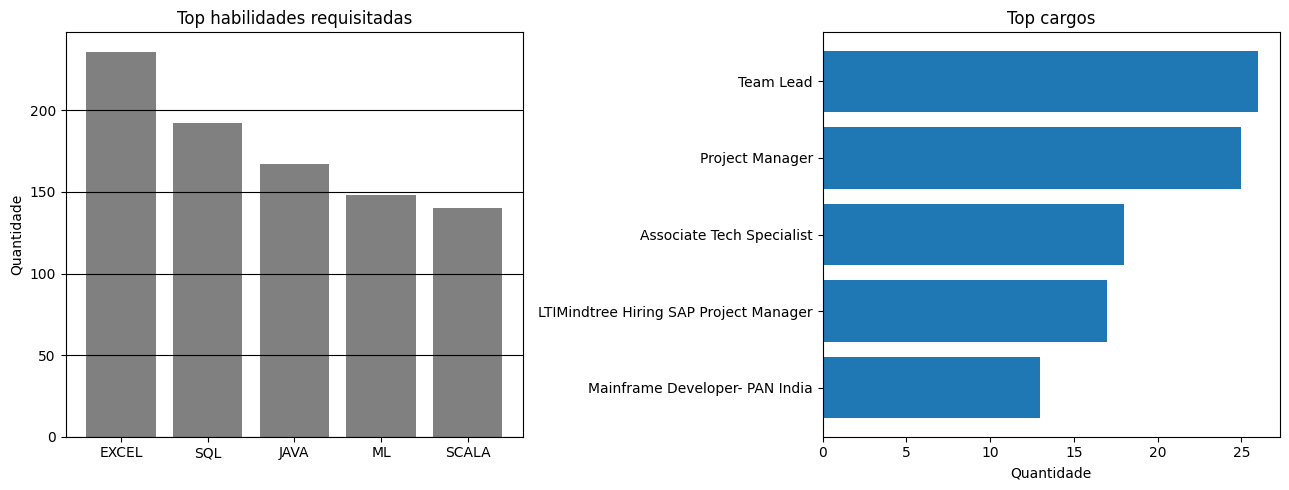

In [ ]:
# Criando gráficos de barras para as 5 habilidades mais requisitadas e os 5 cargos com mais vagas
fig, axs = plt.subplots(1,2, figsize=(13,5))

axs[0].bar(df_top5_habilidades['Habilidades'], df_top5_habilidades['Qnt_vaga'], color = 'Gray')
axs[0].set_title('Top habilidades requisitadas')
axs[0].set_ylabel('Quantidade')
axs[0].grid(axis = 'y', color = 'Black')

axs[1].barh(df_top5_cargos['Cargos'], df_top5_cargos['Contagem'])
axs[1].set_title('Top cargos')
axs[1].set_xlabel('Quantidade')

# Ajustando o layout dos gráficos
plt.tight_layout()
plt.show()

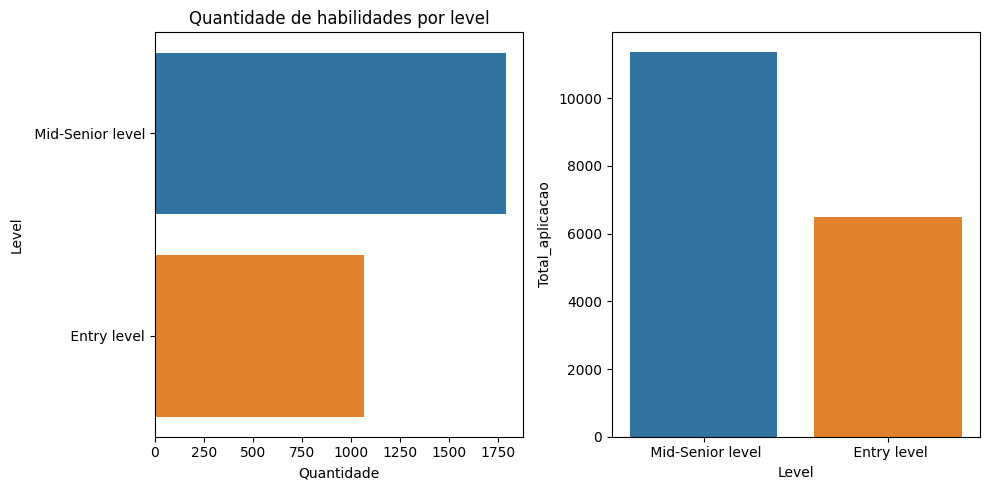

In [ ]:
# Criando gráficos de barras para a quantidade de habilidades por nível e total de aplicações por nível
fig, axs = plt.subplots(1,2, figsize =(10,5))

sns.barplot(
    df_habilidades_por_level,
    x = 'Quantidade',
    y = 'Level',
    hue = 'Level',
    ax = axs[0]
)
axs[0].set_title('Quantidade de habilidades por level')

sns.barplot(
    df_aplicacoes,
    x = 'Level',
    y = 'Total_aplicacao',
    hue = 'Level',
    ax = axs[1]
)
axs[1].set_ylabel('Total de aplicações')
axs[1].set_title('Total de aplicações por level')

# Ajustando o layout dos gráficos
plt.tight_layout()
plt.show()

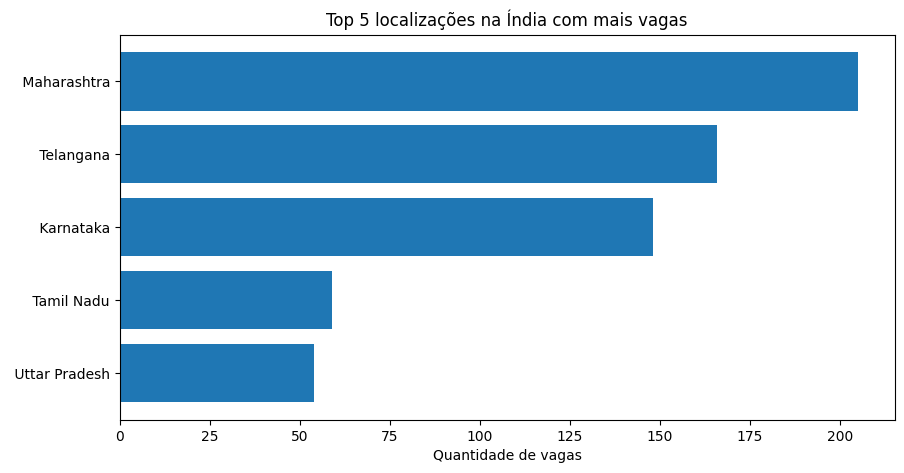

In [ ]:
# Criando gráfico de barras horizontal para as 5 localizações com mais vagas
plt.figure(figsize = (10,5))
plt.barh(df_vagas_localizacao['Localizacao'], df_vagas_localizacao['Quantidade'])
plt.title('Top 5 localizações na Índia com mais vagas')
plt.xlabel('Quantidade de vagas')
plt.gca().invert_yaxis()
plt.show()